In [1]:
from gibbs_sampler import GibbsSampler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor

Text(0, 0.5, 'y')

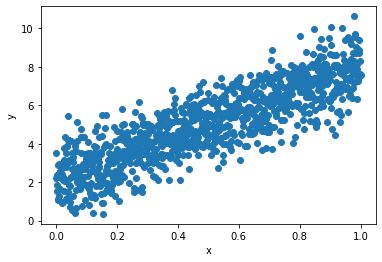

In [12]:
# observed data
n = 1000
_a = 6
_b = 2
X = np.linspace(0, 1, n)
y = _a*X + _b + np.random.randn(n)
synth_plot = plt.plot(X, y, "o")
plt.xlabel("x")
plt.ylabel("y")

In [13]:
# # Load the diabetes dataset
# X, y = datasets.load_diabetes(return_X_y=True)

# # Use only one feature
# X = X[:, np.newaxis, 3]

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
# plt.plot(diabetes_X_train, diabetes_y_train, "b.")

In [15]:
regr = GibbsSampler(intercept = 0, slope =  0)
regr.get_params()

{'alpha': 2,
 'beta': 1,
 'gamma': 2,
 'intercept': 0,
 'mu_0': 0,
 'mu_1': 0,
 'n_iter': 1000,
 'random_state': None,
 'slope': 0,
 'tau_0': 1,
 'tau_1': 1}

In [17]:
pipeline = Pipeline([('scaler', MinMaxScaler()), ('gibbs', GibbsSampler())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
model.fit(X_train.reshape(-1, 1), y_train)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\GIT Projects\gibbs-sampler\gibbs_sampler\_template.py:139: RuntimeWarning: overflow encountered in multiply
  beta_new = beta + np.sum(resid * resid) / 2
C:\GIT Projects\gibbs-sampler\gibbs_sampler\_template.py:131: RuntimeWarning: invalid value encountered in multiply
  mean = tau_1 * mu_1 + tau * np.sum( (y - beta_0) * x)


TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler', MinMaxScaler()),
                                                     ('gibbs',
                                                      GibbsSampler())]),
                           transformer=MinMaxScaler())

In [18]:
# Make predictions using the testing set
y_pred = model.predict(X_train.reshape(-1, 1))

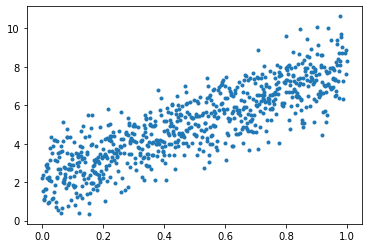

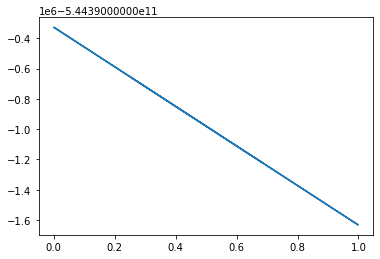

In [19]:
plt.plot(X_train, y_train, '.')
plt.show()
plt.plot(X_train, y_pred)

In [8]:
# # The coefficients
# print("Coefficients: \n", model.regressor_.gibbs.coef_)

In [9]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

NameError: name 'diabetes_y_test' is not defined

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color="orange")
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
https://mr-easy.github.io/2020-05-21-implementing-gibbs-sampling-in-python/
https://jaketae.github.io/study/gibbs-sampling/

In [ ]:
https://www.ljwolf.org/teaching/gibbs.html
    https://towardsdatascience.com/bayesian-thinking-estimating-posterior-distribution-for-linear-regression-data-ketchup-2f50a597eb06